Focus on textual analytics

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data = pd.read_csv('data/Airbnb_Open_Data.csv')
data.head(5)

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

#### Data cleaning (checking for errors,  handling NAs, subsetting the dataframe and editing the format)

In [5]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
data = data.drop(['host name', 'license'], axis=1)

In [7]:
data.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64

In [ ]:
# Let's first look into the country and country code situation 
# We want all observations to be in New York, USA 
data[data.country != 'United States'].head(3)

id                                            NAME      host id  \
156  1087495               Sunny, clean 1 bdrm in W. Village  75987317883   
157  1088047                  Great location in Williamsburg  51756716507   
158  1088599  Light and Airy Upper East Side 1 BDR apartment  30351473270   

    host_identity_verified neighbourhood group    neighbourhood       lat  \
156               verified           Manhattan     West Village  40.73226   
157            unconfirmed            Brooklyn     Williamsburg  40.71363   
158            unconfirmed           Manhattan  Upper East Side  40.77711   

         long country country code  ...    price service fee minimum nights  \
156 -74.00401     NaN          NaN  ...    $738        $148            45.0   
157 -73.96398     NaN          NaN  ...  $1,013        $203             6.0   
158 -73.95270     NaN          NaN  ...    $464         $93             4.0   

     number of reviews last review reviews per month  review rate number  \
156              134.0         NaN              1.24                 3.0   
157               27.0         NaN              0.25                 3.0   
158              126.0         NaN              1.16                 1.0   

     calculated host listings count availability 365  house_rules  
156                             1.0            426.0          NaN  
157                             1.0            396.0          NaN  
158                             2.0            280.0          NaN  

[3 rows x 24 columns]

In [ ]:
# Verify that all of the observations are indeed in the US
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="app")
def fill_country(row):
    if pd.isna(row['country']):
        try:
            location = geolocator.reverse((row['lat'], row['long']), language='en')
            country = location.raw['address']['country']
            return country
        except:
            print(f'failed at {row}')
            return None
    else:
        return row['country']
location = data[(data['country code'] != 'US') & (data['country'] != 'United States')]
geo_column = location.apply(fill_country, axis=1)
geo_column.unique()

array(['United States'], dtype=object)

In [ ]:
# eliminate both of these columns since we verified that all of them are indeed in the US
data = data.drop(['country', 'country code'], axis=1)

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified neighbourhood group neighbourhood       lat  \
0            unconfirmed            Brooklyn    Kensington  40.64749   
1               verified           Manhattan       Midtown  40.75362   
2                    NaN           Manhattan        Harlem  40.80902   
3            unconfirmed            Brooklyn  Clinton Hill  40.68514   
4               verified           Manhattan   East Harlem  40.79851   

       long instant_bookable cancellation_policy  ...  price  service fee  \
0 -73.97237            False              strict  ...  $966         $193    
1 -73.98377            False            moderate  ...  $142          $28    
2 -73.94190             True            flexible  ...  $620         $124    
3 -73.95976             True            moderate  ...  $368          $74    
4 -73.94399            False            moderate  ...  $204          $41    

  minimum nights number of reviews  last review  reviews per month  \
0           10.0               9.0   10/19/2021               0.21   
1           30.0              45.0    5/21/2022               0.38   
2            3.0               0.0          NaN                NaN   
3           30.0             270.0     7/5/2019               4.64   
4           10.0               9.0   11/19/2018               0.10   

  review rate number  calculated host listings count  availability 365  \
0                4.0                             6.0             286.0   
1                4.0                             2.0             228.0   
2                5.0                             1.0             352.0   
3                4.0                             1.0             322.0   
4                3.0                             1.0             289.0   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  
3                                                NaN  
4  Please no smoking in the house, porch or on th...  

[5 rows x 22 columns]

In [9]:
data.isnull().sum() # we will now address missing neighborhood and neighboorhood group 

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64

In [10]:
data['neighbourhood'].value_counts() 
# ok we that some neighborhoods are not abundant in observations, so in our regression we would know which observation it is because of that

neighbourhood
Bedford-Stuyvesant        7937
Williamsburg              7775
Harlem                    5466
Bushwick                  4982
Hell's Kitchen            3965
                          ... 
Rossville                    3
Lighthouse Hill              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [11]:
# We can see that neighborhood group is less specific, so we will rename these 2 observations and then try to fill out the NAs with a clustering algorithm
data['neighbourhood group'].value_counts() 

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [12]:
data['neighbourhood group'] = data['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})


In [13]:
sum(data['neighbourhood group'].isna())

29

In [ ]:
#Let's get into the clustering algo
# I want to try to get both neighboorhood and neighborhood group, and then reevaluate 

from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer

missing_geo = data[data['neighbourhood'].isnull() | data['neighbourhood group'].isnull()]
coordinates_subset = missing_geo[['lat', 'long']]
dbscan = DBSCAN(eps=0.1, min_samples=3) 
dbscan.fit(coordinates_subset)
cluster_labels = dbscan.labels_
imputer = SimpleImputer(strategy='most_frequent') 
data.loc[missing_geo.index, 'neighbourhood'] = imputer.fit_transform(missing_geo[['neighbourhood']])
data.loc[missing_geo.index, 'neighbourhood group'] = imputer.fit_transform(missing_geo[['neighbourhood group']])

In [15]:
data['neighbourhood'].isnull().sum(), data['neighbourhood group'].isnull().sum()

(0, 0)

In [ ]:
# Let's vizualize how the clustering algo performed
import plotly.express as px 

fig = px.scatter_mapbox(data, lat='lat', lon='long', color = 'neighbourhood group', zoom=10)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=9,
                  mapbox_center={"lat": data['lat'].mean(), "lon": data['long'].mean()})
fig.show()

In [17]:
# It would a little more difficult to see but let's also look at the neighborhood group
fig = px.scatter_mapbox(data, lat='lat', lon='long', color = 'neighbourhood', zoom=10)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=8,
                  mapbox_center={"lat": data['lat'].mean(), "lon": data['long'].mean()})
fig.show()
# There are way too many neighbourhoods too display it with color, but overall it seems good as well

In [18]:
#Let's access further the table and distributions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   neighbourhood group             102599 non-null  object 
 5   neighbourhood                   102599 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room type                       102599 non-null  object 
 11  Construction year               102385 non-null  float64
 12  price           

In [19]:
# We can that the price and service fee are not numeric 
data[['price', 'service fee']]

price service fee
0         $966        $193 
1         $142         $28 
2         $620        $124 
3         $368         $74 
4         $204         $41 
...         ...         ...
102594    $844        $169 
102595    $837        $167 
102596    $988        $198 
102597    $546        $109 
102598  $1,032        $206 

[102599 rows x 2 columns]

In [20]:
# We need to get rid of the dollar sign and the commas 
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
data['service fee'] = data['service fee'].str.replace('$', '').str.replace(',', '').astype(float)

#### Data exploration

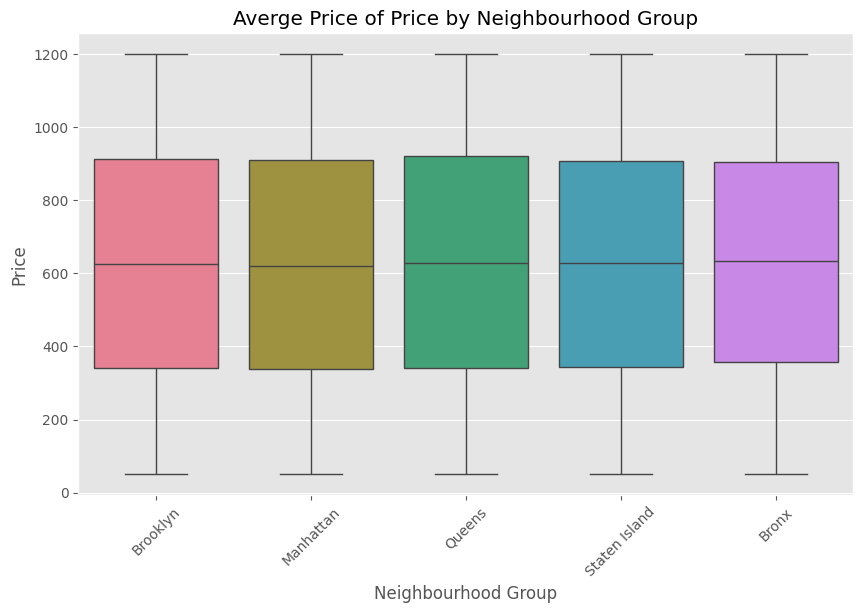

In [21]:
# Now we can actually run some vizualizaitions
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("husl", n_colors=len(data['neighbourhood group'].unique()))
sns.boxplot(x='neighbourhood group', y='price', data=data, palette=custom_palette)
plt.title('Averge Price of Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

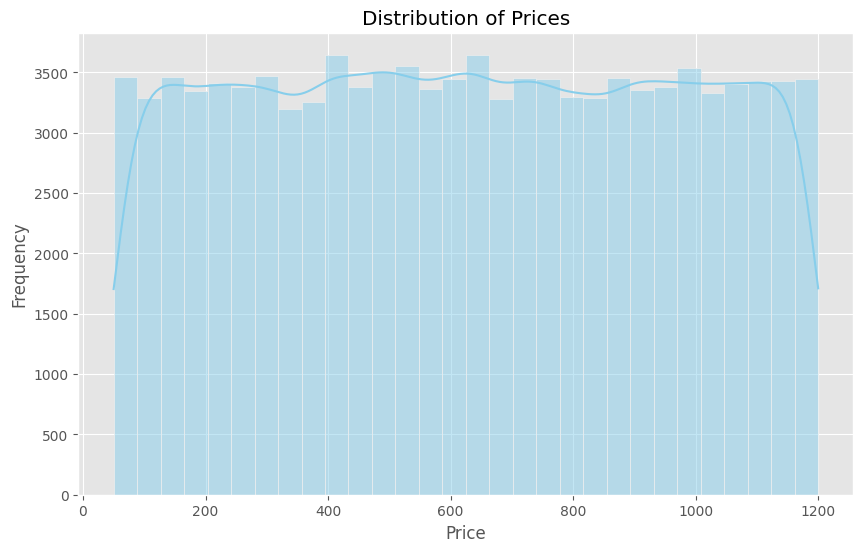

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

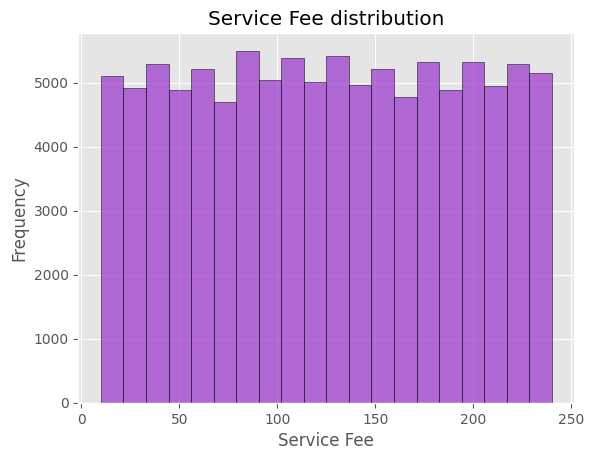

In [23]:
data['service fee'].hist(bins=20, edgecolor="black", color='darkorchid', alpha=0.7)
plt.title('Service Fee distribution')
plt.xlabel('Service Fee')
plt.ylabel('Frequency')
plt.show()

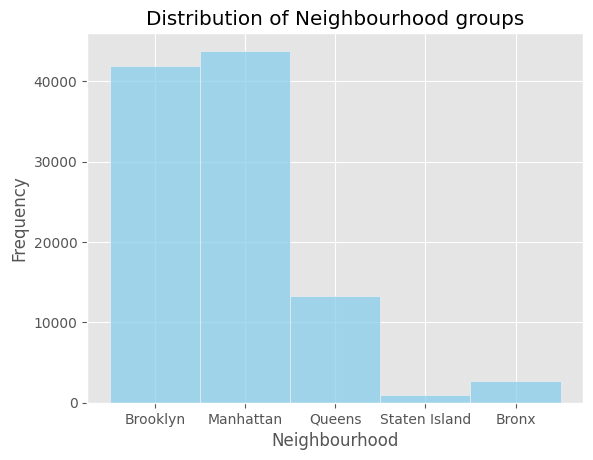

In [24]:
sns.histplot(data['neighbourhood group'], bins=30, color='skyblue')
plt.title('Distribution of Neighbourhood groups')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.show()

In [25]:
data['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43793
Brooklyn         41872
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64

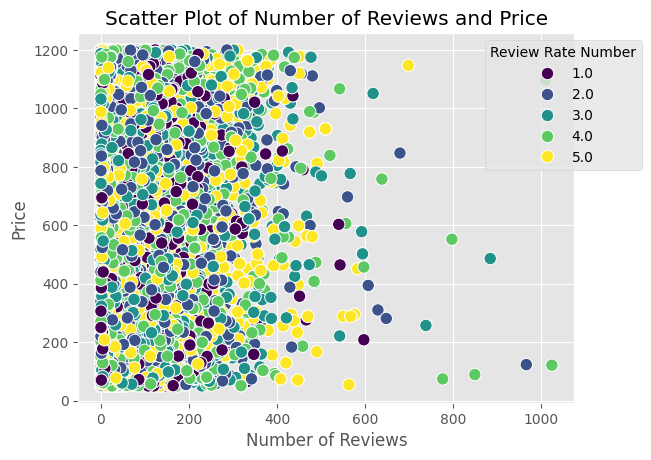

In [31]:
sns.scatterplot(x='number of reviews', y='price', hue='review rate number', data=data, palette='viridis', edgecolor='w', s=80)
plt.title('Scatter Plot of Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.legend(title='Review Rate Number', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [ ]:
# I want to vizualize the most expensive listings for each neighbourhood 
max_neighbourhood = data.sort_values(by='price', ascending=False).groupby('neighbourhood').head(1)

fig = px.scatter_mapbox(max_neighbourhood, lat='lat', lon='long', color = 'price',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15,
                        zoom=10)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=8,
                  mapbox_center={"lat": max_neighbourhood['lat'].mean(), "lon": max_neighbourhood['long'].mean()})

fig.show()
# From this graph, we can see that almost in every neighboorhood, there is at least 1 listing with price close to 1200 (which is the max)
# With the only exception of properties in Staten island

In [33]:
# Lets have a closer look at the Staten Island data 
fig = px.scatter_mapbox(data[data['neighbourhood group'] == 'Staten Island'].dropna(), lat='lat', lon='long',
                        size='price', color = 'price',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=8,
                        zoom=10)
fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=10)

fig.show()

# majority of the data is in the north east
# interestingly some of the data points with extremely low in value (eg price=90) and price =1100 are extremely near each other 

In [35]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag
import string
from textblob import TextBlob
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

# Tokenize, remove stop words and punctuation, and extract adjectives
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def process_text(text):
    if isinstance(text, str):  
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word not in punctuation]

        tagged_words = pos_tag(words)
        adjectives = [word.lower() for word, pos in tagged_words if pos.startswith('JJ')]
        return adjectives
    else:
        return []

data['processed_adjectives'] = data['NAME'].apply(process_text)

In [36]:
# Frequency analysis to find the most common adjectives
all_adjectives = [adj for adjectives in data['processed_adjectives'] for adj in adjectives]
freq_dist_adj = FreqDist(all_adjectives)

print("Most common adjectives:")
print(freq_dist_adj.most_common(10))

Most common adjectives:
[('private', 15572), ('spacious', 7616), ('beautiful', 4764), ('east', 4743), ('sunny', 4356), ('large', 4098), ('modern', 3842), ('apt', 3786), ('central', 3634), ('new', 3411)]


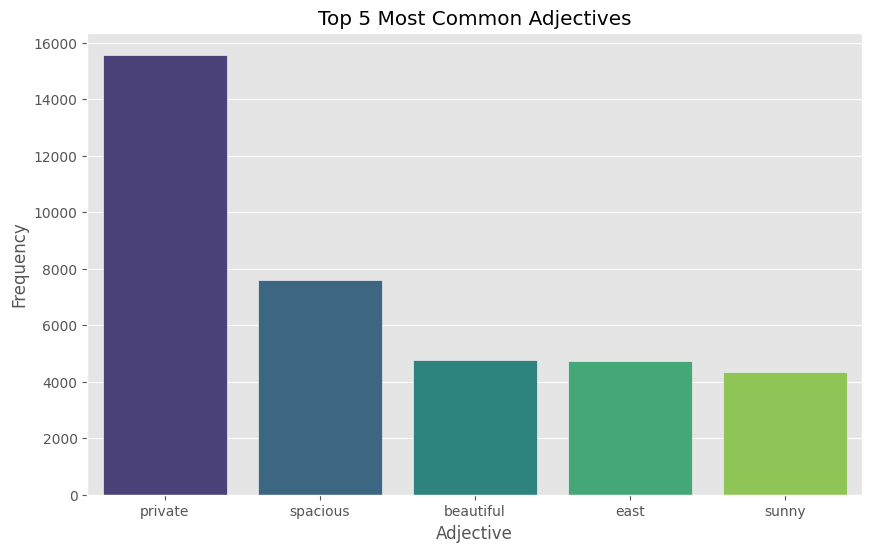

In [37]:
bar_data = pd.DataFrame(list(freq_dist_adj.items()), columns=['Adjective', 'Frequency'])
bar_data = bar_data.sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Adjective', y='Frequency', data=bar_data.head(5), palette='viridis')
plt.title('Top 5 Most Common Adjectives')
plt.show()

In [38]:
# We can gather some useful information from the name variable
# For example, we are going to create 2 indicator variables to encode whether in the listing description smoking or pets were prohibited

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# 0 for NAs because there is a very significant amount of missing housing description
# The purpose is to see if at affects the price if those rules were mentioned or not

def qualitative_indicators(rule_text):
    if pd.notna(rule_text):
        lower_rule_text = rule_text.lower()
        smoking_indicator = any(keyword in lower_rule_text for keyword in ['no smoking', 'smoking is not allowed', 'smoking is prohibited'])
        pet_indicator = any(keyword in lower_rule_text for keyword in ['no pets', 'pets are not allowed', 'pets free', 'pet-free'])
        return smoking_indicator, pet_indicator
    else:
        return 0, 0

data[['smoking_indicator', 'pet_indicator']] = data['house_rules'].apply(qualitative_indicators).apply(pd.Series)

In [39]:
#Some random tests
#1 means prohibited
print("House Rules:")
print(data['house_rules'].iloc[5])
print("Smoke Score:", data['smoking_indicator'].iloc[5])
print("Pet Score:", data['pet_indicator'].iloc[5])

print("House Rules:")
print(data['house_rules'].iloc[1028])
print("Smoke Score:", data['smoking_indicator'].iloc[1028])
print("Pet Score:", data['pet_indicator'].iloc[1028])

# it is important to acknowledge that this approach may not work 100%
# because the current model only pick up the outlined ways to say that there smoking or pets are prohibited
# so it is possible to miss some way to say it in a different way, and missclassify it
# however, I run some tests and for the majority of the data they simply say 'no pets' or 'no smoking'
len(data[data['smoking_indicator']==1]), len(data[data['pet_indicator']==1])

House Rules:
No smoking, please, and no drugs.
Smoke Score: 1
Pet Score: 0
House Rules:
Please tidy up and leave place clean. Dishes are to be placed in dishwasher and cleaned. Laundry to be placed in washer and turned on before leaving.
Smoke Score: 0
Pet Score: 0


(25196, 12013)

#### Modeling

In [40]:
columns = ['neighbourhood group', 'Construction year', 'price', 'service fee',
                    'minimum nights', 'number of reviews',  'review rate number', 
                    'availability 365', 'smoking_indicator', 'pet_indicator']

ml_df = data[columns]
ml_df

neighbourhood group  Construction year   price  service fee  \
0                 Brooklyn             2020.0   966.0        193.0   
1                Manhattan             2007.0   142.0         28.0   
2                Manhattan             2005.0   620.0        124.0   
3                 Brooklyn             2005.0   368.0         74.0   
4                Manhattan             2009.0   204.0         41.0   
...                    ...                ...     ...          ...   
102594            Brooklyn             2003.0   844.0        169.0   
102595           Manhattan             2016.0   837.0        167.0   
102596            Brooklyn             2009.0   988.0        198.0   
102597              Queens             2015.0   546.0        109.0   
102598           Manhattan             2010.0  1032.0        206.0   

        minimum nights  number of reviews  review rate number  \
0                 10.0                9.0                 4.0   
1                 30.0               45.0                 4.0   
2                  3.0                0.0                 5.0   
3                 30.0              270.0                 4.0   
4                 10.0                9.0                 3.0   
...                ...                ...                 ...   
102594             1.0                0.0                 3.0   
102595             1.0                1.0                 2.0   
102596             3.0                0.0                 5.0   
102597             2.0                5.0                 3.0   
102598             1.0                0.0                 3.0   

        availability 365  smoking_indicator  pet_indicator  
0                  286.0                  1              0  
1                  228.0                  0              0  
2                  352.0                  1              0  
3                  322.0                  0              0  
4                  289.0                  1              0  
...                  ...                ...            ...  
102594             227.0                  1              0  
102595             395.0                  0              1  
102596             342.0                  0              0  
102597             386.0                  0              0  
102598              69.0                  0              0  

[102599 rows x 10 columns]

In [41]:
ml_df.isnull().sum()
# we will just frop the NAs because it is a very n insignificant amount of the data representing less than 1% of it

neighbourhood group      0
Construction year      214
price                  247
service fee            273
minimum nights         409
number of reviews      183
review rate number     326
availability 365       448
smoking_indicator        0
pet_indicator            0
dtype: int64

In [42]:
ml_df = ml_df.dropna()

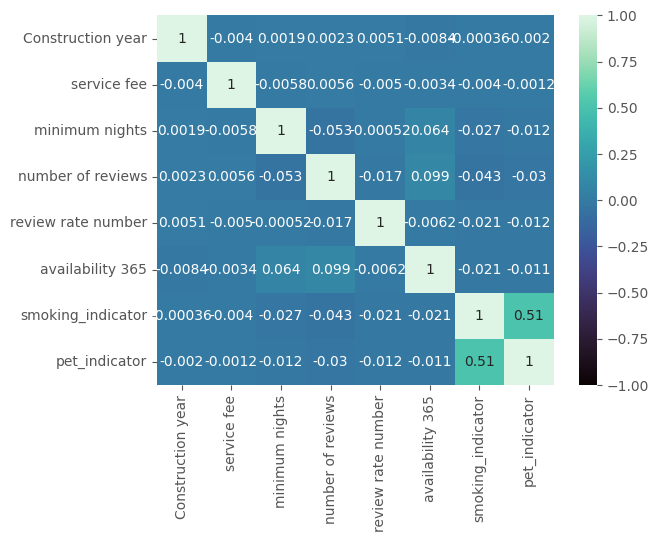

In [43]:
# I think it's best not too include neighborhood too avoid overfitting
# Let's make a corelation matrix to test for mulicollinearity
predictors = ml_df.drop(['price', 'neighbourhood group'], axis=1)
correlation_matrix = predictors.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='mako', vmin=-1, vmax=1)
plt.show()
#none of the variables have a particualry high correlation. Only with the created indicators due to the fact that listing often mention both.

In [44]:
# We will use all of them and create indicator variables for neighbourhood group
ml_df = pd.get_dummies(ml_df, columns=['neighbourhood group'], prefix='')
ml_df.columns = ml_df.columns.str.replace('_', '')
ml_df


Construction year   price  service fee  minimum nights  \
0                  2020.0   966.0        193.0            10.0   
1                  2007.0   142.0         28.0            30.0   
2                  2005.0   620.0        124.0             3.0   
3                  2005.0   368.0         74.0            30.0   
4                  2009.0   204.0         41.0            10.0   
...                   ...     ...          ...             ...   
102594             2003.0   844.0        169.0             1.0   
102595             2016.0   837.0        167.0             1.0   
102596             2009.0   988.0        198.0             3.0   
102597             2015.0   546.0        109.0             2.0   
102598             2010.0  1032.0        206.0             1.0   

        number of reviews  review rate number  availability 365  \
0                     9.0                 4.0             286.0   
1                    45.0                 4.0             228.0   
2                     0.0                 5.0             352.0   
3                   270.0                 4.0             322.0   
4                     9.0                 3.0             289.0   
...                   ...                 ...               ...   
102594                0.0                 3.0             227.0   
102595                1.0                 2.0             395.0   
102596                0.0                 5.0             342.0   
102597                5.0                 3.0             386.0   
102598                0.0                 3.0              69.0   

        smokingindicator  petindicator  Bronx  Brooklyn  Manhattan  Queens  \
0                      1             0  False      True      False   False   
1                      0             0  False     False       True   False   
2                      1             0  False     False       True   False   
3                      0             0  False      True      False   False   
4                      1             0  False     False       True   False   
...                  ...           ...    ...       ...        ...     ...   
102594                 1             0  False      True      False   False   
102595                 0             1  False     False       True   False   
102596                 0             0  False      True      False   False   
102597                 0             0  False     False      False    True   
102598                 0             0  False     False       True   False   

        Staten Island  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
102594          False  
102595          False  
102596          False  
102597          False  
102598          False  

[100683 rows x 14 columns]

In [45]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ml_df.drop('price', axis=1)
y = ml_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(14, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train_scaled, epochs=5, batch_size=32, validation_split=0.3, verbose=1)




Epoch 1/5

1542/1542 [==============================] - 6s 3ms/step - loss: 0.7551 - val_loss: 0.1002
Epoch 2/5
1542/1542 [==============================] - 15s 10ms/step - loss: 0.2571 - val_loss: 0.0577
Epoch 3/5
1542/1542 [==============================] - 3s 2ms/step - loss: 0.1656 - val_loss: 0.0386
Epoch 4/5
1542/1542 [==============================] - 6s 4ms/step - loss: 0.1481 - val_loss: 0.0395
Epoch 5/5
1542/1542 [==============================] - 5s 3ms/step - loss: 0.1512 - val_loss: 0.0331


In [46]:
# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)

# Print actual vs predicted values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions.flatten()})
results

944/944 [==============================] - 2s 2ms/step


Actual    Predicted
0       934.0   908.077087
1      1096.0  1007.695496
2       512.0   523.313721
3       572.0   571.659424
4       715.0   694.648254
...       ...          ...
30200   275.0   309.747498
30201   190.0   238.356689
30202   173.0   239.748108
30203   692.0   721.598694
30204   575.0   576.902588

[30205 rows x 2 columns]

In [47]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
r_squared

0.97805371380960948

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
rmse 

49.017215228161099